In [ ]:
import pandas as pd
import joblib # หรือ import pickle

# --- 1. โหลดโมเดลที่บันทึกไว้ ---
try:
    clf = joblib.load('food_recommendation_model.pkl') # หรือ joblib.load('your_trained_model.joblib')
    print("โหลดโมเดลสำเร็จ!")
except FileNotFoundError:
    print("ข้อผิดพลาด: ไม่พบไฟล์โมเดล 'your_trained_model.joblib'")
    print("กรุณาตรวจสอบว่าไฟล์โมเดลอยู่ในตำแหน่งที่ถูกต้อง หรือฝึกโมเดลใหม่")
    exit() 
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการโหลดโมเดล: {e}")
    exit()

# --- 2. สร้างข้อมูลทดสอบใหม่ ---
new_test_data = {
    'Ages': [30, 45, 33,     # Type 0
             25, 28, 31,     # Type 1
             48, 52, 49,     # Type 2
             36, 38, 40,     # Type 3
             60, 63, 58,     # Type 4
             44, 46, 42,     # Type 5
             34, 32, 30,     # Type 6
             41, 43, 39],    # Type 7

    'Gender': [1, 0, 1,
               0, 1, 0,
               1, 0, 1,
               0, 1, 0,
               1, 0, 1,
               0, 1, 0,
               1, 0, 1,
               0, 1, 0],

    'Height': [170, 160, 175,
               168, 174, 169,
               160, 165, 162,
               178, 175, 177,
               155, 158, 157,
               180, 182, 181,
               172, 174, 170,
               168, 166, 167],

    'Weight': [68, 75, 70,
               65, 68, 66,
               72, 76, 74,
               85, 88, 86,
               60, 62, 63,
               90, 92, 91,
               70, 72, 69,
               74, 76, 73],

    'Bmi': [
        round(68 / ((170/100)**2), 1),
        round(75 / ((160/100)**2), 1),
        round(70 / ((175/100)**2), 1),

        round(65 / ((168/100)**2), 1),
        round(68 / ((174/100)**2), 1),
        round(66 / ((169/100)**2), 1),

        round(72 / ((160/100)**2), 1),
        round(76 / ((165/100)**2), 1),
        round(74 / ((162/100)**2), 1),

        round(85 / ((178/100)**2), 1),
        round(88 / ((175/100)**2), 1),
        round(86 / ((177/100)**2), 1),

        round(60 / ((155/100)**2), 1),
        round(62 / ((158/100)**2), 1),
        round(63 / ((157/100)**2), 1),

        round(90 / ((180/100)**2), 1),
        round(92 / ((182/100)**2), 1),
        round(91 / ((181/100)**2), 1),

        round(70 / ((172/100)**2), 1),
        round(72 / ((174/100)**2), 1),
        round(69 / ((170/100)**2), 1),

        round(74 / ((168/100)**2), 1),
        round(76 / ((166/100)**2), 1),
        round(73 / ((167/100)**2), 1),
    ],

    'Disease_Type': (
        [0]*3 + [1]*3 + [2]*3 + [3]*3 +
        [4]*3 + [5]*3 + [6]*3 + [7]*3
    ),

    'Activity_Level': [
        3, 2, 4,    # Type 0
        1, 4, 2,    # Type 1
        2, 2, 3,    # Type 2
        4, 4, 3,    # Type 3
        1, 1, 2,    # Type 4
        3, 3, 2,    # Type 5
        4, 3, 3,    # Type 6
        1, 1, 2     # Type 7
    ]
}


X_new_test = pd.DataFrame(new_test_data)

print("---------------------ชุดข้อมูลทดสอบใหม่----------------------")
print(X_new_test.count())
print(X_new_test)



#ทำนายผล 
try:
    # ใช้ X_new_test หรือ X_new_test_processed (ถ้ามีการทำ preprocessing)
    new_y_pred = clf.predict(X_new_test) # หรือ clf.predict(X_new_test_processed)

    print("---------------------ผลการทำนายสำหรับชุดข้อมูลใหม่----------------------")
    # (ส่วน print ผลทำนายเดิมของคุณ)
    print("\nผลการทำนาย (Food Recommendation):")
    X_new_test['Predicted_Food'] = new_y_pred
    # print(X_new_test[['Ages', 'Gender', 'Height', 'Weight', 'Bmi', 'Disease_Type', 'Activity_Level', 'Predicted_Food']])
    print(X_new_test[['Ages', 'Gender', 'Height', 'Weight', 'Bmi', 'Disease_Type', 'Predicted_Food']])
    print("---------------------------------------------------------")

except Exception as e:
    print(f"เกิดข้อผิดพลาดระหว่างการทำนายผล: {e}")
    print("ตรวจสอบว่าข้อมูลใหม่มี features ครบถ้วนและผ่านการ preprocessing (ถ้ามี) ถูกต้อง")



โหลดโมเดลสำเร็จ!
---------------------ชุดข้อมูลทดสอบใหม่----------------------
Ages              24
Gender            24
Height            24
Weight            24
Bmi               24
Disease_Type      24
Activity_Level    24
dtype: int64
    Ages  Gender  Height  Weight   Bmi  Disease_Type  Activity_Level
0     30       1     170      68  23.5             0               3
1     45       0     160      75  29.3             0               2
2     33       1     175      70  22.9             0               4
3     25       0     168      65  23.0             1               1
4     28       1     174      68  22.5             1               4
5     31       0     169      66  23.1             1               2
6     48       1     160      72  28.1             2               2
7     52       0     165      76  27.9             2               2
8     49       1     162      74  28.2             2               3
9     36       0     178      85  26.8             3               4
10


--------------------- Classification Report ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

--------------------- Confusion Matrix ----------------------


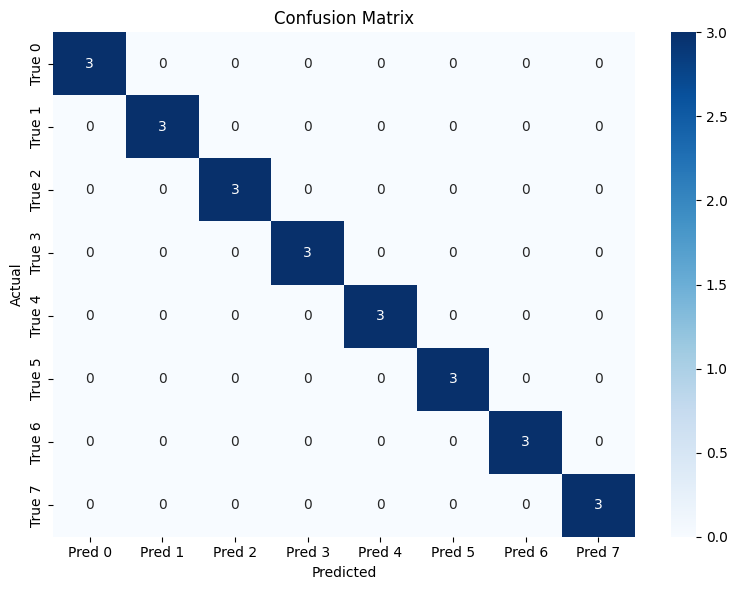

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง y_true จากคอลัมน์ Disease_Type
y_true = X_new_test['Disease_Type']
y_pred = new_y_pred  # ค่าที่ได้จากการ predict

print("\n--------------------- Classification Report ----------------------")
print(classification_report(y_true, y_pred, zero_division=0))

print("--------------------- Confusion Matrix ----------------------")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(8)],
            yticklabels=[f'True {i}' for i in range(8)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
